This is a botebook for inferencing and creating images from fine tunes textual inversion

In [15]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.98it/s]


In [16]:
model_path = '/home/lamitay/vscode_projects/uls_inversion/textual_inversion_3_mixed_viral/learned_embeds-steps-1000.safetensors'
pipe.load_textual_inversion(model_path)

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 49409. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


 10%|█         | 5/50 [00:00<00:03, 12.32it/s]

100%|██████████| 50/50 [00:03<00:00, 13.95it/s]


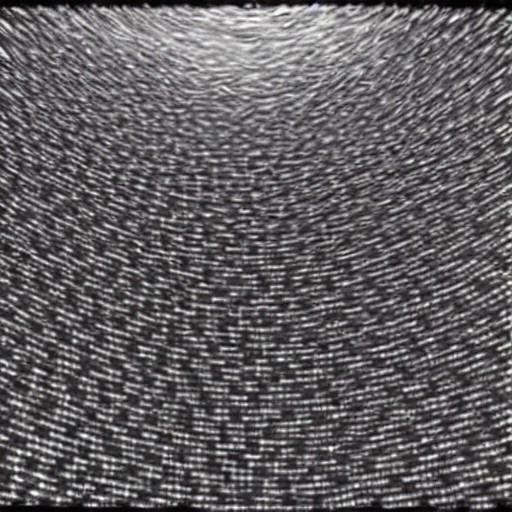

: 

In [17]:
# prompt = "A <cat-toy> backpack"
prompt = "A <viral-pneumonia-ultrasound> image"
# prompt = "A viral pneumonia ultraound image"

image = pipe(prompt, num_inference_steps=50).images[0]
image.show()
# image.save("viral_pneumonia.png")